# Public Schools SAT Scores

## This analysis answers the following questions:
 What are the top 10 best schools in the city by math/reading/writing and by the total SAT score?

In [1]:
# importing neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading .csv file
schools = pd.read_csv("schools.csv")

Data Cleaning:

In [3]:
# Dropping Nulls
schools.dropna(inplace=True)

Adding a column of total SAT scores for all 3 parts

In [4]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

In order to see whether the sample is representative, let's count the number of borough's appearing the dataset. Staten Island appears only 9 times, which does not follow the principle that the sample should be bigger than 30. That means that it can  excluded from the boroughs:

In [5]:
schools["borough"].value_counts()

borough
Brooklyn         104
Bronx             93
Manhattan         84
Queens            65
Staten Island      9
Name: count, dtype: int64

In [6]:
schools = schools[schools["borough"] != "Staten Island"]

## Math Scores
Firstly, the math test scores will be examined.

In [11]:
schools_math = schools[["school_name", "borough", "average_math", "percent_tested"]]
schools_math_avg = schools_math.groupby('borough')[["average_math"]].mean().round(2).sort_values(by="average_math", ascending=False).reset_index()
overall_avg_score_math = schools_math_avg["average_math"].mean()
schools_math_avg

,borough,average_math
0,Queens,463.75
1,Manhattan,455.24
2,Brooklyn,417.37
3,Bronx,405.12


In [10]:
total_math = schools_math.groupby("borough")["average_math"].agg(["count", "mean", "median", "std"]).round(2).reset_index()
total_math_sorted = total_math.sort_values(by='count', ascending=True)
total_math

,borough,count,mean,median,std
0,Bronx,93,405.12,395.0,53.19
1,Brooklyn,104,417.37,394.5,60.89
2,Manhattan,84,455.24,434.0,82.91
3,Queens,65,463.75,452.0,73.34


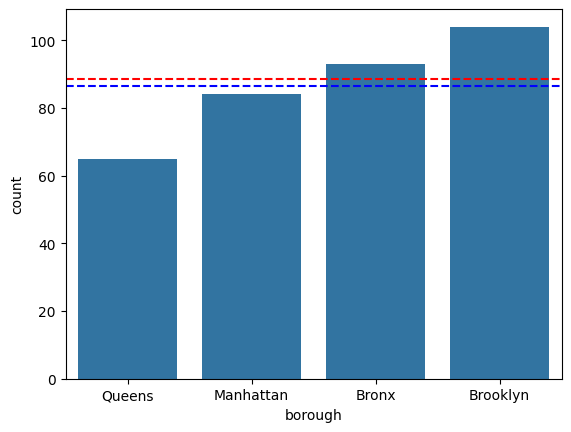

In [12]:
sns.barplot(data=total_math_sorted, x='borough', y='count')
avg_line_count_math = total_math['count'].mean()
mid_line_count_math = total_math['count'].median()

plt.axhline(y=avg_line_count_math , color='b', linestyle='--', label='Overall Average')
plt.axhline(y=mid_line_count_math , color='r', linestyle='--', label='Overall Average')

<Axes: xlabel='borough', ylabel='average_math'>

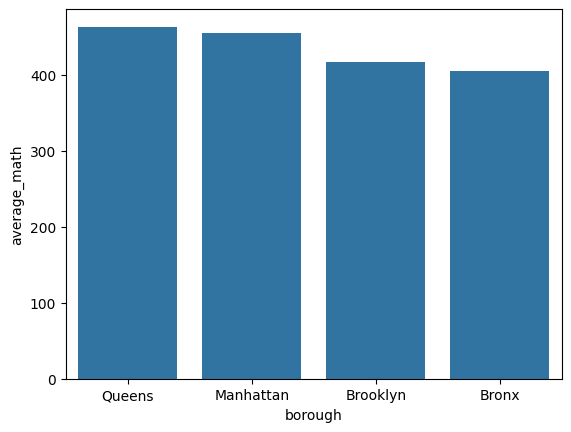

In [13]:
sns.barplot(data=schools_math_avg, x="borough", y="average_math")

Top 5 best schools math SAT score:

In [14]:
top_10_schools_math = schools_math.groupby("school_name", as_index=False)[["school_name", "average_math"]].head(5)
top_10_schools_math.head(5)

,school_name,average_math
1,Essex Street Academy,395
2,Lower Manhattan Arts Academy,418
3,High School for Dual Language and Asian Studies,613
4,Henry Street School for International Studies,410
5,Bard High School Early College,634


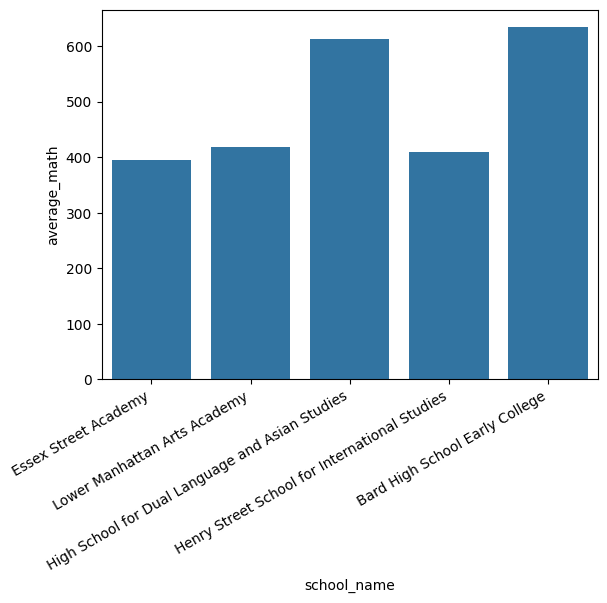

In [15]:
sns.barplot(data=top_10_schools_math.head(), x="school_name", y="average_math")
plt.xticks(rotation=30, ha="right")
plt.show()

## Reading Scores

In [16]:
schools_reading = schools[["school_name", "borough", "average_reading", "percent_tested"]]
schools_reading_avg = schools_reading.groupby('borough')[["average_reading", "percent_tested"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_reading_avg["average_reading"].mean()
schools_reading_avg

,borough,average_reading,percent_tested
0,Bronx,403.92,58.65
1,Brooklyn,411.64,62.64
2,Manhattan,444.51,71.39
3,Queens,444.20,69.31


<Axes: xlabel='borough', ylabel='average_reading'>

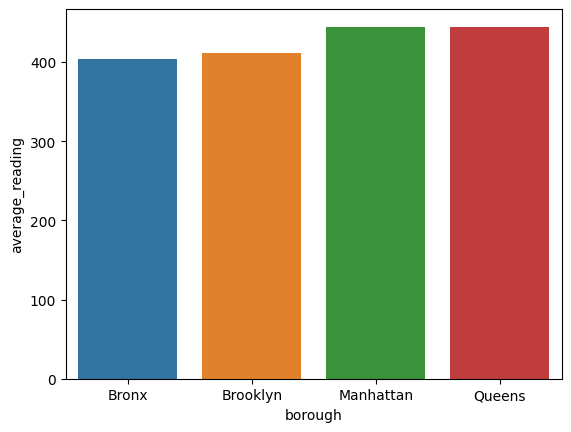

In [17]:
colors = ['red' if borough == 'Staten Island' else 'green' if borough == 'Queens' else 'blue' for borough in schools_math_avg['borough']]
sns.barplot(data=schools_reading_avg, x="borough", y="average_reading", hue="borough", legend=False)

In [18]:
top_10_schools_reading = schools_reading.groupby("school_name", as_index=False)[["school_name", "average_reading"]].head(5)
top_10_schools_reading.head(5)

,school_name,average_reading
1,Essex Street Academy,411
2,Lower Manhattan Arts Academy,428
3,High School for Dual Language and Asian Studies,453
4,Henry Street School for International Studies,406
5,Bard High School Early College,641


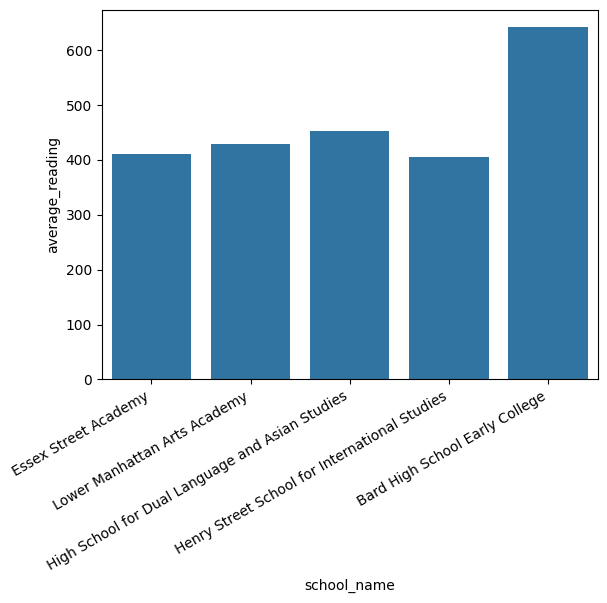

In [19]:
sns.barplot(data=top_10_schools_reading.head(), x="school_name", y="average_reading")
plt.xticks(rotation=30, ha="right")
plt.show()

## Writing Scores

In [20]:
schools_writing = schools[["school_name", "borough", "average_writing", "percent_tested"]]
schools_writing_avg = schools_writing.groupby('borough')[["average_writing", "percent_tested"]].mean().round(2).reset_index()
overall_avg_score_reading = schools_writing_avg["average_writing"].mean()
schools_writing_avg

,borough,average_writing,percent_tested
0,Bronx,397.61,58.65
1,Brooklyn,403.85,62.64
2,Manhattan,438.92,71.39
3,Queens,440.63,69.31


<Axes: xlabel='borough', ylabel='average_writing'>

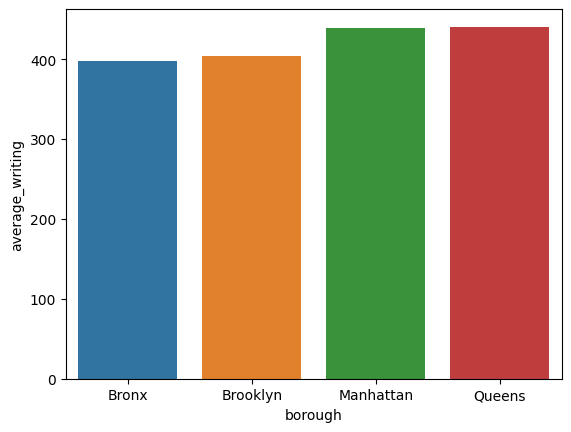

In [21]:
sns.barplot(data=schools_writing_avg, x="borough", y="average_writing", hue="borough", legend=False)

In [22]:
top_10_schools_writing = schools_writing.groupby("school_name", as_index=False)[["school_name", "average_writing"]].head(5)
top_10_schools_writing.head(5)

,school_name,average_writing
1,Essex Street Academy,387
2,Lower Manhattan Arts Academy,415
3,High School for Dual Language and Asian Studies,463
4,Henry Street School for International Studies,381
5,Bard High School Early College,639


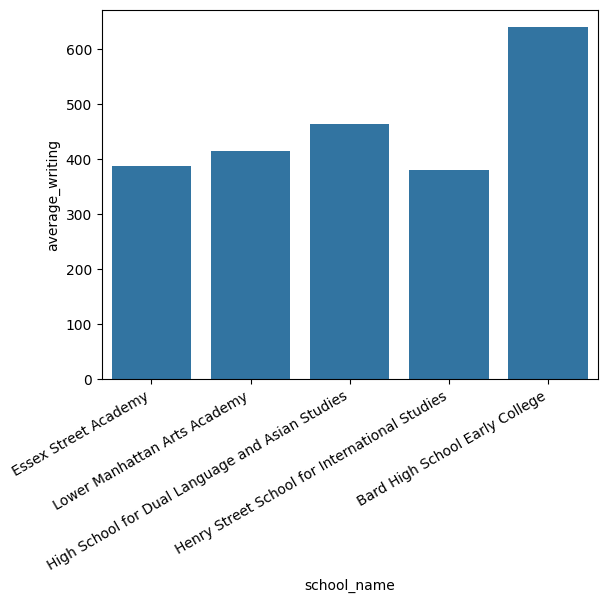

In [23]:
sns.barplot(data=top_10_schools_writing.head(), x="school_name", y="average_writing")
plt.xticks(rotation=30, ha="right")
plt.show()

## Total Scores

In [24]:
total_score = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "median"]).round(2)
total_score

,count,mean,median
borough,,,
Bronx,93,1206.66,1191.0
Brooklyn,104,1232.86,1187.0
Manhattan,84,1338.67,1287.0
Queens,65,1348.58,1290.0


<Axes: xlabel='borough', ylabel='mean'>

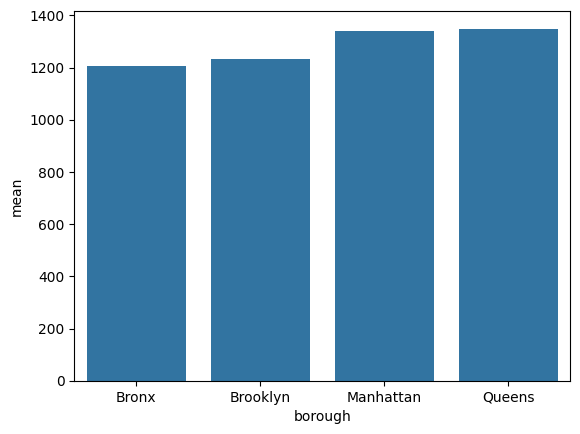

In [25]:
sns.barplot(data=total_score, x="borough", y="mean")

In [27]:
top_5_schools_total = schools.groupby("school_name", as_index=False)[["school_name", "total_SAT"]].head(5)
top_5_schools_total.head(5)

,school_name,total_SAT
1,Essex Street Academy,1193
2,Lower Manhattan Arts Academy,1261
3,High School for Dual Language and Asian Studies,1529
4,Henry Street School for International Studies,1197
5,Bard High School Early College,1914


<Axes: xlabel='school_name', ylabel='total_SAT'>

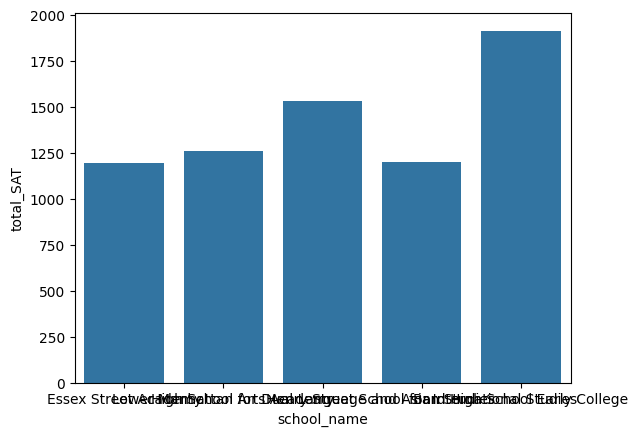

In [28]:
sns.barplot(data=top_5_schools_total.head(5), x="school_name", y="total_SAT")